Expectation Maximization (EM) Algorithm

In [42]:
import requests
import pandas as pd

def generateData(path):
  """
  Call API and generate data in the form of dataframe
  """
  data = {'Data':[]}

  for i in range(30):
    response = requests.get(path).json()

    # check statusCode to be 200 only then there will be data
    if response['statusCode']==200:
      data['Data'].append(response['body'])
  
  # generate dataframe using pandas
  df = pd.DataFrame(data)
  return df


def EM_algo(data,theta_a,theta_b,iters=30):
  """
  Main function of implemented EM algorithm
  """

  # list of theta values at all iterations
  thetas = [(theta_a,theta_b)]

  for id in range(iters):
    A, B = calcE(data,iters,theta_a,theta_b)
    
    theta_a, theta_b = calcM(A,B)

    thetas.append((theta_a,theta_b))
  
  return thetas,theta_a,theta_b


def calcE(data,iters,theta_a,theta_b):
  """
  Calculate expectation values for heads and tails of both coins A and B
  Then store them in the dictionary A and B in the format: {id:[head_val,tail_val]}
  """
  head_a, tail_a = 0,0
  head_b, tail_b = 0,0

  A = {}
  B = {}
  
  for i in range(iters):
    data_row = data.iloc[i]["Data"]
    head, tail, coin_a, coin_b, total = calcLikelihood(data_row,theta_a,theta_b)

    # calculate normalized value of likelihood values
    norm_a = coin_a/total
    norm_b = coin_b/total

    # calculate expected heads and tails of coin A
    head_a = norm_a * head
    tail_a = norm_a * tail

    # calculate expected heads and tails of coin A
    head_b = norm_b * head
    tail_b = norm_b * tail

    # store values in respective dictionaries
    A[i] = [head_a, tail_a]
    B[i] = [head_b, tail_b]
  
  return A, B


def calcM(A,B):
  """
  Calculate the theta values of both coins that maximizes expected number of 
  heads and tails calculated
  """
  # summation of heads and tails values of coin A
  A_head = sum([A[x][0] for x in A])
  A_tail = sum([A[x][1] for x in A])

  # summation of heads and tails values of coin B
  B_head = sum([B[x][0] for x in B])
  B_tail = sum([B[x][1] for x in B])

  # calculation of theta values
  theta_a = A_head / (A_head + A_tail)
  theta_b = B_head / (B_head + B_tail)

  return theta_a, theta_b


def calcLikelihood(data,theta_a,theta_b):
  """
  Calculate likelihood values of both coins
  """
  head = sum([data.count("1")])
  tail = sum([data.count("0")])

  coin_a = (pow(theta_a,head))*(pow((1-theta_a),tail))
  coin_b = (pow(theta_b,head))*(pow((1-theta_b),tail))

  return head, tail, coin_a, coin_b, (coin_a + coin_b)


def mainFunc(theta_a = 0,theta_b = 0):
  """
  Main function to call all the required functions
  """
  path = "https://24zl01u3ff.execute-api.us-west-1.amazonaws.com/beta"
  data = generateData(path)
  
  # initialize the values
  #uncomment two lines followed to assume thetas as probabilities of head and tails
  #theta_a = data.iloc[0]["Data"].count("1")/20
  #theta_b = 1 - theta_a

  #theta_a = 0.5
  #theta_b = 0.7
  iterations = 30

  thetas,theta_a,theta_b = EM_algo(data,theta_a,theta_b,iterations)
  print("theta_a:",theta_a,"\ntheta_b:",theta_b)
  plot_coin_likelihood(data, thetas)

  

In [40]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np


def plot_coin_likelihood(data, thetas=None):
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(data,c,Y[i][j]))
        Z.append(z)
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B)$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        

def coin_marginal_likelihood(data, coinA, coinB):
    # P(X | theta)
    trials = []
    for i in range(30):
        roll = data.iloc[i]["Data"]
        head, tail, coin_a, coin_b, total = calcLikelihood(roll, coinA, coinB)
       
        trials.append(np.log(0.5 * (coin_a + coin_b)))
    return sum(trials)

Example 1: Generate data and execute EM first time

Assume theta_a as 0.5 and theta_b as 0.2

theta_a: 0.68204908777543 
theta_b: 0.2883771624317466


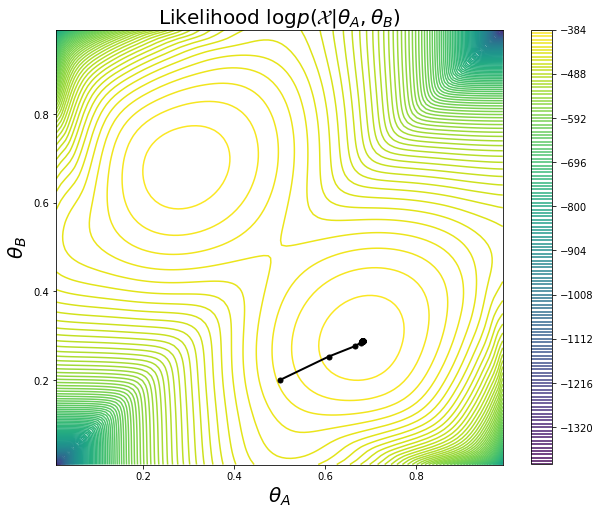

In [43]:
mainFunc(0.5,0.2)

Example 2: Generate data and execute EM second time

Assume theta_a as 0.6 and theta_b as 0.9

theta_a: 0.2973425925578221 
theta_b: 0.7410286353727555


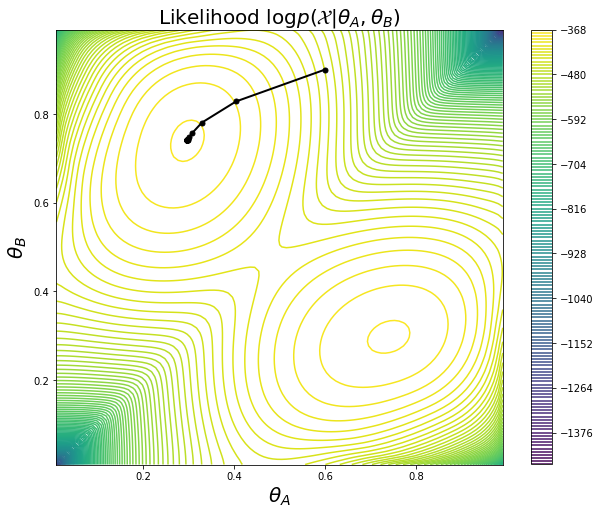

In [44]:
mainFunc(0.6,0.9)